# Coursework 1: $\ell_0$-Methods for Sparse Recovery

[x] By tick the checkbox, we hereby declare that this coursework report is our own and autonomous work. We have acknowledged all material and sources used in its preparation, including books, articles, reports, lecture notes, internet software packages, and any other kind of document, electronic or personal communication. This work has not been submitted for any other assessment.

## 1.1 Least Squares: Solution Stability (30%)

### 1.1.1 SVD

Find both compact and full SVD for the following matrices
$$
    \begin{aligned}
        \bm{A} 
        & = \frac{1}{2} \begin{bmatrix}
            1 & 1 & -2 \\
            1 & 1 & 2  \\
            1 & -1 & 2  \\
            1 & -1 & -2 
        \end{bmatrix}, \\
        \bm{B} 
        & = \frac{1}{2} \begin{bmatrix}
            1 & 1 & 1 & 1\\
            -1 & 1 & 1 & -1 \\
            2 & -2 & -2 & 2
        \end{bmatrix}.
    \end{aligned}
$$

In [1]:
using LinearAlgebra
A = 0.5*[1 1 -2;1 1 2; 1 -1 2; 1 -1 -2]
U_f, S_f, Vt_f = svd(A;full = true)
for i in 1:length(S_f)
    S_f[i] = round(S_f[i], digits = 10)
end
display("U matrix")
display(U_f)

display("Singular values")
display(S_f)

display("V matrix")
display(Vt_f)
# The following matrix is the full matrix of A

"U matrix"

4×4 Matrix{Float64}:
 -0.5  -0.5  -0.5  -0.5
  0.5  -0.5  -0.5   0.5
  0.5  -0.5   0.5  -0.5
 -0.5  -0.5   0.5   0.5

"Singular values"

3-element Vector{Float64}:
 2.0
 1.0
 1.0

"V matrix"

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  -1.0  -0.0
 0.0  -0.0  -1.0
 1.0  -0.0  -0.0

In [2]:
A = 0.5*[1 1 -2;1 1 2; 1 -1 2; 1 -1 -2]
U_f, S_f, Vt_f = svd(A;full = false)
for i in 1:length(S_f)
    S_f[i] = round(S_f[i], digits = 10)
end
display("U matrix")
display(U_f)

display("Singular values")
display(S_f)

display("V matrix")
display(Vt_f)
# The following matrix is the compact matrix of A

"U matrix"

4×3 Matrix{Float64}:
 -0.5  -0.5  -0.5
  0.5  -0.5  -0.5
  0.5  -0.5   0.5
 -0.5  -0.5   0.5

"Singular values"

3-element Vector{Float64}:
 2.0
 1.0
 1.0

"V matrix"

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  -1.0  -0.0
 0.0  -0.0  -1.0
 1.0  -0.0  -0.0

In [3]:
B = 0.5*[1 1 1 1;-1 1 1 -1; 2 -2 -2 2]
F = svd(B;full = true)
for i in 1:length(S_f)
    S_f[i] = round(S_f[i], digits = 10)
end
display("U matrix")
display(U_f)

display("Singular values")
display(S_f)

display("V matrix")
display(Vt_f)
# The following matrix is the full matrix of B

"U matrix"

4×3 Matrix{Float64}:
 -0.5  -0.5  -0.5
  0.5  -0.5  -0.5
  0.5  -0.5   0.5
 -0.5  -0.5   0.5

"Singular values"

3-element Vector{Float64}:
 2.0
 1.0
 1.0

"V matrix"

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  -1.0  -0.0
 0.0  -0.0  -1.0
 1.0  -0.0  -0.0

In [4]:
B = 0.5*[1 1 1 1;-1 1 1 -1; 2 -2 -2 2]
F = svd(B;full = false)
for i in 1:length(S_f)
    S_f[i] = round(S_f[i], digits = 10)
end
display("U matrix")
display(U_f)

display("Singular values")
display(S_f)

display("V matrix")
display(Vt_f)
# The following matrix is the compact matrix of B

"U matrix"

4×3 Matrix{Float64}:
 -0.5  -0.5  -0.5
  0.5  -0.5  -0.5
  0.5  -0.5   0.5
 -0.5  -0.5   0.5

"Singular values"

3-element Vector{Float64}:
 2.0
 1.0
 1.0

"V matrix"

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  -1.0  -0.0
 0.0  -0.0  -1.0
 1.0  -0.0  -0.0

In the above 4 sections of code where the results for Full and Compact SVD of A and B have been provided initially the SVD function was producing an error. This error of slightly incorrect value being produced has been solved. The approach to solve this error involved rounding the the singular values of the SVD produced as this was what was specifically effected.

### 1.1.2 Error Bounds

Consider a linear system 
$$
\boldsymbol{y} = \boldsymbol{A} \boldsymbol{x} + \boldsymbol{w},
$$
where $\boldsymbol{y} \in \mathbb{R}^m$ is the measurement vector, $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ is a given matrix, $\boldsymbol{x} \in \mathbb{R}^{n}$ is the unknown data, and $\boldsymbol{w} \in \mathbb{R}^m$ represents random noise. Assume that $\boldsymbol{w} \sim  \mathcal{N}(0,\sigma^2 I)$. Let $\hat{\boldsymbol{x}}$ be the least squares estimate of $\boldsymbol{x}$.

1. Find lower and upper bounds of 
   $$
      \| \hat{\boldsymbol{x}} - \boldsymbol{x} \|^2
   $$
   using $\| \boldsymbol{w} \|^2$ and singular values of $\boldsymbol{A}$. Justify your results by showing your derivations.


#### Solution 1.1.2.1:

Since $(A = U \Sigma V^{\top})$, the least squares solution is given by the following: 
\begin{gather*}
\hat{x} =A^{+} y=A^{+}\left(A x_{0}+w\right) \\
=\left(A^{\top} A\right)^{-1} A^{\top}\left(A x_{0}+w\right) \\
=x_{0}+V \mathbf{\Sigma}^{-1} U^{\top} w 
\end{gather*}
Hence, $\left\|\hat{x}-x_{0}\right\|_{2}=\left\|V \Sigma^{-1} U^{T} \omega\right\|$ and therefore,
$$
\left\|\hat{x}-x_{0}\right\|^2=\left\|V \Sigma^{-1} U^{T} \omega\right\|^2
$$

We must first observe that it is  possible to simply the above equation. Since we know that $V$ is an unitary and orthogonal matrix. This means mathematically that: $\left.V^{T} V=V V^{T} = I\right.$
We can therefore use the below proven equation to simplify.
\begin{gather*}
\|\textbf{Vz}\|^2=(\textbf{Vz})(\textbf{Vz})^T=\textbf{zV}\textbf{V}^T\textbf{z}^T = \textbf{z}\textbf{z}^T = \|\textbf{z}\|^2
\end{gather*}

Because $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ is a real matrix and $\Sigma^{-1} U^{T} w$ has the dimension of $\mathbb{R}^{n}$, we can take $z =\Sigma^{-1} U^{T} w$ as $z\in \mathbb{R}^{n}$.

The simplified equation then holds:
$$
\left\|\hat{x}-x_{0}\right\|^2=\left\|V \Sigma^{-1} U^{T} \omega\right\|^2 =\left\| \Sigma^{-1} U^{T} \omega\right\|^2
$$

Assume $z$ as $\left\|\ U^{T} \omega\right\|$.
Given $z \in \mathbb{R}^{n}$ and $\Sigma^{-1} \in \mathbb{R}^{n \times n}$, we thus can show that
$$
\begin{gathered}
\left\|\Sigma^{-1} z\right\|=\sqrt{\frac{z_{1}^{2}}{\sigma_{1}}+\frac{z_{2}}{\sigma_{2}}^{2}+\ldots+\frac{z_{n}{ }^{2}}{\sigma_{n}}} \\
\sigma_{\max }^{-1}\|z\|=\sqrt{\frac{z_{1}}{\sigma_{\max }}^{2}+\frac{z_{2}}{\sigma_{\max }}^{2}+\ldots+\frac{z_{n}{ }^{2}}{\sigma_{\max }}} \\
\sigma_{\min }^{-1}\|z\|=\sqrt{\frac{z_{1}}{\sigma_{\min }}^{2}+\frac{z_{2}}{\sigma_{\min }}^{2}+\ldots+\frac{z_{n}{ }^{2}}{\sigma_{\min }}}
\end{gathered}
$$
Thus, it can be easily showed that:
$$ \label{eq1}
\sigma_{\operatorname{max}}^{-1}\|z\| \leq\left\|\Sigma^{-1} z\right\| \leq \sigma_{\min }^{-1}\|z\| 
$$

However, we still need to find the bounds of $\left\|\ U^{T} \omega\right\|$ to solve for the lower and upper bounds.

Because it's 2-norm, we simply have $0 \leq\left\|U^{T} \omega\right\| $.
We also know that every induced norm is sub-multiplicative, 
$$
\|A B\| \leq\|A\|\|B\|
$$
Thus, we square the above lemma and we can get
$$
\left\|U^{T} \omega\right\|^{2} \leq\|\omega\|^{2}
$$ 
We can infer the result because $U$ is an unitary and orthogonal matrix. Therefore, $\left.U^{T} U=U U^{T}=\left\|U^{T}\right\|^{2} = I\right.$.

Hence,
$$
0\leq\left\|U^{T} \omega\right\|\leq\|\omega\|^{2}
$$

Based on the above previous equations, we can then derive the error bounds of $\left\|\Sigma^{-1} U^{T} w\right\|^2$ as follows:
\begin{gather*}
0 \leq\left\|V \Sigma^{-1} U^{T} \omega\right\|^{2} = \left\|\Sigma^{-1} U^{T} \omega\right\|^{2} \leq \infty \\
\sigma_{\max }^{-2}\left\|U^{T} \omega\right\|^{2} \leq\left\|\Sigma^{-1} U^{T} \omega\right\|^{2} \leq \sigma_{\min }^{-2}\left\|U^{T} \omega\right\|^{2}\\
0 \leq \sigma_{\max }^{-2}\left\|U^{T} \omega\right\|^{2} \leq\left\|\Sigma^{-1} U^{T} \omega\right\|^{2} \leq \sigma_{\min }^{-2}\left\|U^{T} \omega\right\|^{2}\leq \sigma_{\min }^{-2}\|\omega\|^{2}
\end{gather*}

We finally obtain the bounds for $\left\|\Sigma^{-1} U^{T} \omega\right\|^{2}$:
$$
0 \leq\left\|\Sigma^{-1} U^{T} \omega\right\|^{2} \leq \sigma_{\min }^{-2}\|\omega\|^{2}
$$
Therefore, the upper and lower bound of $\left\|\hat{x}-x_{0}\right\|^{2}$ are $\sigma_{m i n}^{-2}\|\omega\|^{2}$ and 0 respectively, shown below as well:
$$
0 \leq\left\|\hat{x}-x_{0}\right\|^{2}\leq \sigma_{\min }^{-2}\|\omega\|^{2}
$$

2. Find 
   $$
      \text{E}_{W}[ \| \hat{\boldsymbol{x}} - \boldsymbol{x} \|^2 ]
   $$
   using $\sigma^2$ and singular values of $\boldsymbol{A}$. Justify your results by showing your derivations.

#### Solution 1.1.2.2

\begin{gather*} 
\mathrm{E}_{W}\left[|\hat{\boldsymbol{x}}-\boldsymbol{x}|^{2}\right] =\mathrm{E}_{W}\left[\left|V \Sigma^{-1} U^{T} \omega\right|^{2}\right] \\ =\mathrm{E}_{W}\left[\left|\Sigma^{-1} U^{T} \omega\right|^{2}\right] \\ 
=\mathrm{E}_{W}\left[\frac{1}{\sigma_{1}^2}\left|U^{T} \omega\right|^2+\frac{1}{\sigma_{2}^2}\left|U^{T} \omega\right|^2+\ldots+\frac{1}{\sigma_{n}^2}\left|U^{T} \omega\right|^{2}\right]\\ 
=\mathrm{E}_{W}\left[\left(\frac{1}{\sigma{1}^2}+\frac{1}{\sigma_{2}^2}+\ldots+\frac{1}{\sigma_{n}^2}\right)\left|U^{T} \omega\right|^{2}\right]
\end{gather*}


If we break down $ \mathrm{E}_{W} \left[\| U^{T} \omega\|  ^{2} \right]$, We know that:
$$ \mathrm{E}_{W} \left[\| U^{T} \omega\|  ^{2} \right] =  \mathrm{Var}\left [ \|U^{T} \omega\| \right ] + \mathrm{E}_{W}\left [ \|U^{T} \omega\| \right ] ^{2} $$
$ \mathrm{E}_{W}\left [ \|U^{T} \omega\| \right ] ^{2} = 0 $ because $ \omega $ belongs to the Gaussian distribution $\omega \sim \mathcal{N}(0,\,\sigma^{2}I)\,$ and we know that $U^{T} \omega$ has dimension of of $n$x$1$ matrix. $U^{T} \omega$ is a vector with each row being a normal distribution with variance $\sigma^2$. This is because $U^{T}$ is an orthonormal matrix; therefore, each row $u_i$ will be multiplied by $\omega$.


Hence, 
$$
 \mathrm{E}_{W} \left[\| U^{T} \omega\|  ^{2} \right] =  \mathrm{Var}\left [ \|U^{T} \omega\| \right ] = n \sigma ^{2} 
$$

Therefore,  the final bounds of $\text{E}_{W}[ \| \hat{\boldsymbol{x}} - \boldsymbol{x} \|^2 ]$ is:
$$
\sigma_{\max }^{-2}n\sigma^2 \leq\text{E}_{W}[ \| \hat{\boldsymbol{x}} - \boldsymbol{x} \|^2 ]\leq \sigma_{\min }^{-2}n\sigma^2
$$


3. Design simulations to numerically verify your results.   
   1. To simplify simulations, let $m=n=2$. 
   2. To evaluate the expectation $\text{E}[\cdot]$, at least 100 random trials are expected. 
   3. The following functions can be useful: `Random.seed!(3);`, `A = randn(Float64,2,2)`, and `svd` from `LinearAlgebra` library.

In [5]:
m = n = 2
num = 1000000
simu_ex,theo_upper,theo_lower = 0, 0, 0
using Random 
using LinearAlgebra
Random.seed!(3);

for i = 1:num
    A = randn(Float64,m,n)
    # how to get diagonal matrix
    U,s,Vt = svd(A)
    w = randn(Float64,m)
    S = Diagonal(s)
    theo_upper = theo_upper +  (1/minimum(s)).^2*n
    theo_lower = theo_lower + (1/maximum(s)).^2*n
    simu_ex = simu_ex + norm(inv(S)*transpose(U)*w).^2
   
end
theo_upper = theo_upper/num
theo_lower = theo_lower/num
simu_ex = simu_ex/num
print("  simulation expectation is  ",simu_ex)
print("\n  theo_upper bound is  ",theo_upper)
print("\n  theo_lower bound is  ",theo_lower)

  simulation expectation is  8.601498980706455e6
  theo_upper bound is  3.487034054201745e7
  theo_lower bound is  1.1363793532523072

### Hence, the simulation result is within upper and lower bounds.

## 1.2 Sparse Linear Inverse Problems: $\ell_0$-Minimization

### 1.2.1 Measurement Matrix Generation and Properties (30%)

Write a function to first generate a random Gaussian matrix $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ (using `randn`) and then normalize the columns so that $\| \boldsymbol{A}_{:,n} \|_2 = 1,~ \forall n$.

Below is the function, 'gen_GaussianMat', which is coded to randomly generate a matrix with specific row and column dimension sizes and then proceed to normalize every column within that generated matrix.

In [6]:
function gen_GaussianMat(m,n)
#normalize columns
    A = randn(m,n)
    for i = 1:n
        v = A[:,i]
        A[:,i] = v/norm(v,2)
    end
    return A
end

#test
gen_GaussianMat(5,4)

5×4 Matrix{Float64}:
 -0.189316    0.840673   0.27806     0.634461
  0.722332    0.246541   0.0874164  -0.612907
  0.538106   -0.289817  -0.817533    0.350361
  0.0848127  -0.303462   0.495163   -0.208653
  0.381635    0.237493  -0.0386618   0.235617

### Mutual Coherence Constant (MCC)

1. Write a function to calculate MCC $\mu(\boldsymbol{A})$. 
2. Test your function with an $\boldsymbol{A} \in \mathbb{R}^{7 \times 10}$. 
3. Comment on the complexity of computing MCC for a general matrix $\boldsymbol{A} \in \mathbb{R}^{m \times n}$. 


The function below is designed to follow the below rules and implement the equation to calculate $\mu(\mathbb{A})$. This equation is what defines the Mutual Coherence of a matrix, which is denoted as $\mu(\mathbb{A})$.

\begin{gather*}
\mu(\mathbb{A}) = \max\limits_{i\neq j}\frac{|\langle\textbf{a}_i,\textbf{a}_j\rangle|}{\|\textbf{a}_i\|_2\|\textbf{a}_j\|_2}
\end{gather*}
When $\|\textbf{a}_i\|_2, \forall i \in [n]$, then $\mu(\mathbb{A}) = \max\limits_{i\neq j}|\langle\textbf{a}_i,\textbf{a}_j\rangle|$.

The function, 'MCC', has a random Gaussian matrix of specific size taken as an input. The columns of this matrix, which are normalized from by being created from our previous function, 'gen_GaussianMat', are then analysed for correlation between each other to find the 2 columns which are the most correlated. At the end of the function, the value of $\mu(\mathbb{A})$ is returned.

A way in which we optimised the function and reduced the complexity of the problem was to was to increment the value of 'c', which is the lower bound of the inner 'for' loop, at every iteration . This optimised the function as no pair of columns is checked the same pair twice.


In [7]:
# function MCC computes the mutual coherence of the matrix A
# inputs : nomalized matrix A
# output : the mutual coherence of matrix A

function MCC(A)
    
    μ = newμ = 0
    c = 1 # increment c at every iteration to not check the same pair again
    m = length(A[:,1])
    n = length(A[1,:])
    # A is an already normalized matrix
    for i = 1:n
        for j = c:n
            if i!=j
                newμ = abs(dot(A[:,i], A[:,j])) # compute the dot product of the 2 columns
            end
        μ = max(μ,newμ) # chech whether that the new computed value is bigger that the current maximum
        end
        c+=1 
    end
    return μ
    
end

MCC (generic function with 1 method)

Test MCC function with a matrix $\boldsymbol{A} \in \mathbb{R}^{7 \times 10}$.

In [8]:
    A = gen_GaussianMat(7,10);
    print(" The Mutual Coherence Constant is ");
    μ = MCC(A);
    print(μ);

 The Mutual Coherence Constant is 0.8674166677010916

Comment on the complexity of computing MCC for a general matrix  $\boldsymbol{A} \in \mathbb{R}^{m \times n}$. 

The computational complexity when calculating the MCC for a matrix is dependent on the number of columns that the matrix has. To note also the number of columns is the only factor that effects this complexity. 

For the example of a general matrix,  $\boldsymbol{A} \in \mathbb{R}^{m \times n}$, where the number of columns is denoted by 'n', has the computational complexity of O(n!).

The example we tested above: matrix  $\boldsymbol{A} \in \mathbb{R}^{7 \times 10}$ has a complexity of O(10!).


### Restricted Isometry Constant (RIC)

1. Write a function to calculate RIC $\delta_K(\boldsymbol{A})$. 
2. Test your function with an $\boldsymbol{A}\in \mathbb{R}^{7 \times 10}$ for $K=2,3$. 
3. Comment on the complexity of computing RIC for a general matrix $\boldsymbol{A} \in \mathbb{R}^{m \times n}$. 

The definition provided to us in notes is as follows: The RIC $\delta_K$ is defined as the smallest constant $\delta$ for which the K-RIP holds, i.e., 
\begin{gather*}
\delta_K = inf\{\delta: (1-\delta)\|\mathbf{q}\|_2^2 \leq\|\mathbf{A}_T\mathbf{q}\|_2^2 \leq(1+\delta)\|\mathbf{q}\|_2^2. \forall|T| \leq K, \forall\mathbf{q} \in \mathbb{R}^{|T|}\}.
\end{gather*}

The function 'RIC' takes a random Gaussian matrix of specific size as an input, just like the 'MCC' function, along with a specified value of 'K'. The stages within the function begin with the initialisation of several variables, followed by the calculation of the eigenvalues for all the sub-matrices composed from all the combinations of K vectors where K$\leq $m. Later on these values are then used to eventually calculate the $\delta$_global value, which is returned at the end of the function.


In [9]:
using Combinatorics

A = gen_GaussianMat(7,10)

# function RIC computes the restricted isometry constant of matrix A for a certain k
# inputs: matrix A, the parameter K
# output: δ the restricted isometry constant
function RIC(A,k)

    no_cols=length(A[1,:]);
    no_rows= length(A[:,1]);
    col_indexes=collect(1:no_cols);
    δ_global = 2;
    
    B=zeros(no_rows,k);
    x=collect(combinations(col_indexes,k)); # generate the combinations of all k columns

    for row_index in 1:length(x)
        for column_index in 1:k
            B[:,column_index] = A[:,x[row_index][column_index]]; # form the matrix with k column with the current combination
        end

        eigenvalues = eigvals((B')*B); # compute the eigen values of B 
        # our approach uses the equivalence for tall matrices as K>m in our case 
        for i in 1:length(eigenvalues)
            eigenvalues[i] = round(eigenvalues[i], digits = 10)
        end

        min_eig = eigenvalues[1];
        max_eig = eigenvalues[length(eigenvalues)];

        i=1;
        while min_eig == 0
            min_eig = eigenvalues[i+1];
        end

        δ_low = 1 - min_eig  # compute the minimum value for the lower part of the inequality
        δ_high = max_eig - 1 # compute the maximum for the higher part of the inequality
        δ_local = max(δ_low, δ_high) # we use max to satisfy both of the inqualities 
        δ_global = min(δ_global, δ_local) # check whether the new δ is bigger than the minimum so far
    end
    return δ_global;
end

RIC (generic function with 1 method)

Test RIC function with a matrix $\boldsymbol{A} \in \mathbb{R}^{7 \times 10}$.

In [10]:
    A = gen_GaussianMat(7,10);
    print("Restricted Isometry Constant for k=2 is ");

    delta2 = RIC(A,2);
    println(delta2);

    print("Restricted Isometry Constant for k=3 is ");

    delta3 = RIC(A,3);
    println(delta3);

Restricted Isometry Constant for k=2 is 0.0005907417999999609
Restricted Isometry Constant for k=3 is 0.033658439999999956


Comment on the complexity of computing RIC for a general matrix $\boldsymbol{A} \in \mathbb{R}^{m \times n}$

The RIC is different from the MCC. As mentioned before, the MCC is considered easy to compute when given the matrix $\boldsymbol{A}$. However, the computational complexity of the RIC for matrix $\boldsymbol{A}$ can dramatically increase with the sparsity K. In other words, the complexity of RIC heavily depends on the fixed 'K' value.

For example, a general matrix,  $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ has the computational complexity of O($2^K$).

In the two examples that were tested above, the complexity of RIC for $\boldsymbol{A} \in \mathbb{R}^{7 \times 10}$ when K=2 is O($2^2$) and when K=3 is O($2^3$)


### MCC and RIC

Discuss the relationship between $\mu(\boldsymbol{A})$ and RIC $\delta_2(\boldsymbol{A})$. 

MCC is defined as the correlation between the most correlated 2 normalized column vectors in the matrix.

On the other hand, when calculating the RIC, we first must compute the eigenvalues for all the sub-matrices composed from all the combinations of K vectors, with K <= m. When the vectors in the matrix are orthogonal, the eigenvalues will be equal to 1; hence, a RIC (1-sigma) very close to 1 means that the vectors are closely correlated. This is proved and shown in our results above since the RIC for K=2 is significantly lower than a RIC for K=3. This is because it far harder to find 3 orthogonal vectors when compared to finding 2, but also true due to the monotonicity of RIC which tells us that $\delta_1\leq\delta_2\leq\delta_3\leq\dots$

Taking all factors previously discussed into account, MCC is quantizing the equivalent thing as RIC for K=2. Both providing a measurement of the correlation between any 2 vectors in the matrix. However, a RIC close to 0 is equivalent to a MCC close to 1.


### 1.2.2 $\ell_0$-Minimization Methods (40%)

#### Sparse Signal Generation

Let 
$$
\boldsymbol{y} = \boldsymbol{A} \boldsymbol{x} + \boldsymbol{w},
$$
where $\boldsymbol{y} \in \mathbb{R}^m$, $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ with unit $\ell_2$-norm columns, $\boldsymbol{x} \in \mathbb{R}^n$ is the sparse signal, and $\boldsymbol{w} \in \mathbb{R}^m$ represents random noise with $\boldsymbol{w} \sim \mathcal{N}(0,\sigma^2 I)$. For a given number $S$ of nonzero elements, one has $\| \boldsymbol{x} \|_0 = S$, $\mathcal{T}$ is the support set of nonzero elements, and $\boldsymbol{x}_{\mathcal{T}} \sim \mathcal{N}(0,I)$. 

Write a function `sparse_data_gen` to generate sparse data and measurements according to the above description. The following requirements should be met. 
* Users can specify $m,n,S,\sigma$. 
* Users can get $y,A,x,\mathcal{T}$ as returns of the function. 

The function `StatsBase > sample` can be useful. 

In [11]:
using SparseArrays
using StatsBase
using JLD2

function sparse_data_gen(m::Int64,n::Int64,S::Int64,σ::Float64)

    A = gen_GaussianMat(m,n) # generate a nomalized m by n matrix
    items = [j for j= 1:n]
    wv = [1 for j = 1:n]
    w = σ*randn(Float64,m,1) # generate the noise with variance σ
    # sparse support, or index.
    x = zeros(Float64,n)
    sparseSupport = sample( items , Weights(wv) , S, replace = false) # pick S random position for the non zero elements 
    randnTemp = randn(S, 1)                                           # of x
    x[sparseSupport] = randnTemp #fill x with all the non-zero elements
    
    y = A*x + w

    return y,A,x,sparseSupport 
end

sparse_data_gen (generic function with 1 method)

In [12]:
"""
see if users want to use it
"""
# print("Please input m \n") 
# m = readline()
# println("m is ", m)

# print("Please input n \n") 
# n = readline()
# println("n is ", n)

# print("Please input S \n") 
# S = readline()
# println("S is ", S)

# print("Please input σ \n") 
# σ = readline()
# println("σ is ", σ)
# print("\n")

# m= parse(Int,m)
# n= parse(Int,n)
# S= parse(Int,S)
# σ= parse(Float64,σ)


# sparse_data_gen(m,n,S,σ)

"see if users want to use it\n"

#### Numerical Comparison

Implement two greedy algorithms including 

1. Subspace pursuit algorithm  
2. Another greedy algorithm (OMP or IHT)



# OMP implementation

The following section of code is related to the OMP alogrithm, followed by testing its performance. It contains functions that are required for OMP and the actual OMP implementation named accordingly. See comments for the in depth explanations of the functions. 

In [13]:
# find the index of the column of matrix A which yields the higest dot product with a vector
# * inputs vector (the vector to be checked) and A(the matrix which has the columns)
# * output index (the index of the found column)
function max_index_finder(A,vector)
    max=0;                         
    index=0;
    no_cols=length(A[1,:]);
    for i in 1:no_cols
        if(abs(dot(A[:,i],vector))>max)
            index=i;
            max=abs(dot(A[:,i],vector));
        end    
    end
    return index;    
end

# check whether element beta is in the vector
# the purpose of this function is to make the union between a vector and an integer as efficient as possible
# * inputs vector (the vector to be checked) and beta(the element that is searched in the vector)
# * output found (a boolean which is true if the element was found and false otherwise)
function find_element(vector, beta) 
    found = false;    
    for i in 1:length(vector)    
        if(vector[i]==beta)      
            found= true;
            break;    
        end
    end
    return found;    
end

# the omp function performs the OMP algorith to find the solution with sparcity S 
# inputs y (result of the system equation), A (the system matrix) and S (sparcity)
# output the solution of x (the input of the system)
function omp(y,A,S)
    y_res=y;     
    T=[0]; 
    no_cols=length(A[1,:]);
    x=zeros(no_cols,1);    
    current_column=0; 
    for i in 1:S
        current_column=max_index_finder(A,y_res);# find the column which yields the maximum dot product
        if(!find_element(T,current_column)); # the union between an element and a vector is just an append if the element
            append!(T,current_column);       # is not in the vector
            indices=T[2:length(T)];      
            x_buf=pinv(A[:,indices])*y; # select the desired columns and perform the inverse of A   
            for j in 2:length(T)
                x[T[j]]=x_buf[(j-1),1]; # updated the solution of x
            end
        end
        y_res=y-A*x; #  compute the residue        
    end
    return x;        
end

y,A,x,T=sparse_data_gen(7,10,2,0.0); # check the OMP implementation
@show x
@show x_sol = omp(y,A,4)
@show norm(x-x_sol)

x = [-0.3879427403496277, 0.9255409134924106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
x_sol = omp(y, A, 4) = [-0.3879427403496277; 0.9255409134924104; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
norm(x - x_sol) = 2.220446049250313e-16


2.220446049250313e-16

# SP algorithm implementation

In [14]:
using Distributions
using Random
using JLD2

function supp_of_H(vector, s) # function that returns the indices of s values with the highest norm
      H=[1] 
      if s > 1 
          for i in 2:s 
              append!(H,i) 
          end 
      end 
      small_vector = vector[1:s] # we assume the first s values in the vector have the highest norm
      for i in (s+1):length(vector) # starting from s+1 we check if there is another element with a higher norm
          if abs(vector[i]) > minimum(abs.(small_vector)) 
              H[argmin(abs.(small_vector))] = i # replace the index 
              small_vector[argmin(abs.(small_vector))] = vector[i] # replace the value 
          end 
      end
      return H 
  end
function subspace_pursuit(y,A,s)
    T = supp_of_H((A')*y,s) # take an initial T set of indices
    T = sort(T) 
    A_T = A[:,T] # generate the sparse matrix A
    y_res = y - A_T*pinv(A_T'*A_T)*A_T'*y # calculate the initial y residue
    iterations = 0
    xl = []
    while true
        iterations += 1
        y_res_last = y_res # store the previous y residue
        T_new = supp_of_H((A')*y_res,s) # get another set of s
        T_union = union(T,T_new) # combine them to get a set of 2s (expand support)
        T_union = sort(T_union)
        A_T = A[:,T_union] # generate a 2s sparse matrix A
        b = pinv(A_T'*A_T)*A_T'*y # estimate a 2s sparse signal
        T = supp_of_H(b,s) # shrink support
        T = T[1:s]
        T = T_union[T]
        A_T = A[:,sort(T)]
        xl = pinv(A_T'*A_T)*A_T'*y # estimate s sparse signal
        y_res = y - A_T*xl # compute estimation error
        if ((abs((norm(y_res_last,2)-norm(y_res,2)))<1e-100)||(norm(y_res,2)==0 || iterations > 100))
            break
        end
    end
    x_final=zeros(1,length(A[1,:]))
    x_final[1,sort(T)]=xl 
    return (x_final')
end



subspace_pursuit (generic function with 1 method)

and two majorization minimization (MM) algorithms for

3. $\ell_0$ indicator function 
    $$
       \min~ \delta \left( \| \bm{x} \|_0 \le S \right) + \frac{\alpha}{2} \| \bm{y} - \bm{A} \bm{x} \|_2^2
    $$


4. $\ell_0$ function 
   $$
      \min~ \| \bm{x} \|_0 + \frac{\alpha}{2} \| \bm{y} - \bm{A} \bm{x} \|_2^2
   $$

and test their performance. 

For MM algorithms, write the closed form solutions of the involved proximal operators, and discuss how the choices of parameters $\alpha$ and $\gamma$ affect the performance. 

**The closed form solutions of the involved proximal operators**



The closed form of solution is the prox operation of l0-norm:

Hard thresholding function $H_{S}(a)$ :

$$
H_{S}(\boldsymbol{a})=\operatorname{Prox}_{\delta\left(\|\cdot\|_{0} \leq S\right)}
$$
Set all but the largest (in magnitude) $S$ elements of $a$ to zero.

**Comments: the effects of $\alpha$ and $\gamma$**

The constant $\alpha$ is related to the scaling factor, $\lambda$ : $\alpha = \frac{1}{\lambda}$ . 

$$
       \min~ \lambda\delta \left( \| \bm{x} \|_0 \le S \right) + \frac{1}{2} \| \bm{y} - \bm{A} \bm{x} \|_2^2
$$

When we do proximal operations , the scaling factor $\lambda = \frac{1}{\alpha}$ can help us to scale threshold values when we don't know the sparsity S. Thus the prox operator of norm_l0 will allow larger values( >> threshold values $\lambda$ ) to 0.

If $\lambda$ is too large, the hard threshold step (which used prox function) nearly lets all elements to 0.
If $\lambda$ is too small, the hard threshold step (which used prox function) nearly filters no elements and just outputs the same elements again.

However, since we already know the region of sparsity S, we just set all but largest magnitudes of values to 0 (prox_indicator_l0_norm). Thus, we get corresponding filtered vectors.

The symbol $\gamma$ is just a small step factor when updating x_next from x_cur.

If $\gamma$ is too large, the forward step (which is used for updating x_axis ) cannot converge.
If $\gamma$ is too small, the forward step increases x slowly, which needs to cost more time to get to the destination.

**Recommendations for tests**

Set $m = 32,~ n=64$, and let $S$ vary in `4:4:20`. For the numerical tests, we only consider noiseless case, i.e., $\sigma^2 = 0$. 

**Remark**
1. It is a good practice to modularize your code, for example, have functions dedicated to the involved proximal operators.   
2. It will take some time to run tests. Please remember to save your test results in files so that they can be loaded directly from files for marking. 

## Useful function used in the section below
### hard_threshold_s defined below

In [15]:
"""
hard threshold , which equals to prox_indicator(indicator of l0 norm)
set all but largest values of vectors to 0.

Inputs: 
a vector, sparsity number s.

Outputs:
a filtered vector.
"""
function hard_threshold_s(vector, s)
    #find the first s abs largest elements 
    index = sortperm(abs.(vector),rev = true)
    sparsesupport = vector[index]
    max_index = index[1:s]
    vector_prox = zeros(size(vector))
    s_region = sparsesupport[1:s]
    vector_prox[max_index] = s_region 
    return vector_prox
end


hard_threshold_s

## Two MM functions:
### Solution 1.with indicator: MM_L0_indicator
### Solution 2.without indicator: MM_L0_without_indicator

In [16]:
"""

Basic pricinples of MM :

loop:
1.Calculate g(xl|xl).  f(xl).
2.Update MM functions(xl - γ*transpose(A)*(A*x-y)). (by gradient descent).
3.Put MM functions into hard_threshold. x_l+1 = hard_threshold(MM functions).
4.Minimize the gap between surrogate function g(x|xl) and object function f(x), until
x_next - x_cur is very small or just g(x|xl) - f(x) is small.
end loop

Inputs:
measurement vector y,
gaussian matrix A,
sparsity S.

Outputs:
rebuilt signal x_sol,
final function value f_val.
"""
function MM_L0_without_indicator(y,A,S)

    #options
    # max_iter is for maximum iteration
    max_iter = 10000
    criteria = 1e-8
    iter = 0

    #  0 < γ < 1/(sig(A)).^2
    U,Sv,Vt = svd(A)
    lamda_max = maximum(Sv)
    γ_upper = 1/((lamda_max)^2)

    #choose a suitable gamma
    γ = γ_upper-0.05

    #set gamma and α
    α = 1

    #a blanket of functions
    l0_norm(x) = norm(x,0)
    least_squares(x) = (α/2)*(norm(y-A*x)).^2
    sur(x,xl) = (1/(2*γ))*(norm(x - (xl + γ*Transpose(A)*(y-A*xl))))^2

    #surrogate function
    g(x,xl) = l0_norm(x) + sur(x,xl)

    #object function
    f(x) = l0_norm(x) + least_squares(x)
  
    #gradient_h
    #this gradient_h is used for updating x
    grad_h(A,y,x) = transpose(A)*(A*x - y)

    #initialization
    x_cur = zeros(size(x_origin))
    x_next = zeros(size(x_origin));
    x_sol = zeros(size(x_cur))

    ## main loop
    # this loop is for (g - f), to let them gradually equal to each other

    while iter < max_iter

        #gradient h
        #x_next = x_cur - γ*transpose(A)*(A*x-y)
        gradient_h = grad_h(A,y,x_cur)

        #a forward step, for updating x
        r = x_cur - γ * gradient_h
        r = reshape(r,n)

        #prox_indicator o l0
        x_next = hard_threshold_s(r,S)

        g_val = g(x_next,x_cur)
        f_val = f(x_cur)
        error = g_val - f_val
        
        # when norm < criteria, break

            if (norm((x_next-x_cur),2)<criteria)||(norm(error)/norm(f_val)<1e-4)
                x_sol = x_next

                return x_sol,f_val
                break
            end

        iter = iter + 1
        x_cur = x_next
    end   

end

function MM_L0_indicator(y,A,S)

    #options
    max_iter = 10000
    criteria = 1e-8
    iter = 0

    #  0 < γ < 1/(sig(A)).^2
    U,Sv,Vt = svd(A)
    lamda_max = maximum(Sv)
    γ_upper = 1/((lamda_max)^2)

    #choose a suitable gamma 
    γ = γ_upper-0.05

    #set gamma and α
    α = 1

    #a blanket of functions
    indicator(x) = (norm(x,0)<= S) ? 0 : Inf
    least_squares(x) = (α/2)*(norm(y-A*x)).^2
    sur(x,xl) = (1/(2*γ))*(norm(x - (xl + γ*Transpose(A)*(y-A*xl))))^2

    #surrogate function
    g(x,xl) = indicator(x) + sur(x,xl)

    #object function
    f(x) = indicator(x) + least_squares(x)
  
    #gradient_h
    #this gradient_h is used for updating forward step
    grad_h(A,y,x) = transpose(A)*(A*x - y)

    #initialization
    x_cur = zeros(size(x_origin))
    x_next = zeros(size(x_origin));
    x_sol = zeros(size(x_cur))

    ## main loop
    # this loop is for (g - f), to let them gradually equal to each other
    # max_iter is for maximum iteration
    
    while iter < max_iter

        #gradient h
        #x_next = x_cur - γ*transpose(A)*(A*x-y)
        gradient_h = grad_h(A,y,x_cur)

        # a forward step
        r = x_cur - γ * gradient_h
        r = reshape(r,n)

        #prox_indicator o l0
        x_next = hard_threshold_s(r,S)
        #x_next = hard_threshold_s(r,S)
        g_val = g(x_next,x_cur)
        f_val = f(x_cur)
        error = g_val - f_val

        # when norm of them < criteria, break

            if (norm((x_next-x_cur),2)<criteria)||(norm(error)/norm(f_val)<1e-4)
                x_sol = x_next
                #@show error

                return x_sol,f_val
                break
            end

        #iteration number
        iter = iter + 1
        x_cur = x_next
    end   

    @show iter

end

MM_L0_indicator (generic function with 1 method)

In [17]:
"""
comparison:
show x_origin and sparseSupport
show x_sol and Supp_x_sol

"""
#signal generation
m,n,S,σ = 32,64,4,0.0
y,A,x_origin,sparseSupport = sparse_data_gen(m,n,S,σ);

#for comparison
x_sol,val_f = MM_L0_indicator(y,A,S)
#x_sol,val_f = MM_L0_without_indicator(y,A,S)
Supp_x_sol = supp_of_H(x_sol,S) 

#original supportset and rebuilt supportset
@show sort(Supp_x_sol)
@show sort(sparseSupport);

#original signal and rebuilt signal
@show x_sol;
@show x_origin;

#error between two signals
@show norm(x_origin - x_sol);

sort(Supp_x_sol) = [3, 5, 39, 58]
sort(sparseSupport) = [3, 5, 39, 58]
x_sol = [0.0, 0.0, 1.0432354353357876, 0.0, 0.30204162361707176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.89347953249659, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.548704410605286, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
x_origin = [0.0, 0.0, 1.0432354177044365, 0.0, 0.3020416651636412, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8934794834665583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5487044440335418, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
norm(x_origin - x_sol) = 7.455450531562099e-8


# Check functions 

In [18]:
"""
run checks functions can show correct_bit rate for all S =4:4:20
every S run 5000 times MM_L0_indicator functions or  MM_L0_ without_indicator functions 
"""


function check_correct_bit(m,n,σ,total)
    
    S = collect(4:1:20)
    correct_bit_l0_in = zeros(17)
    correct_bit_l0_without_in = zeros(17)
    correct_bit_omp = zeros(17)
    correct_bit_sp = zeros(17)

        for j = 1:length(S)
            s = S[j]
            success_l0 = 0
            success_l0_no_in = 0
            success_omp = 0
            success_sp = 0
            for i = 1:total
                #signal sparse_sig_generation
                y,A,x_origin,sparseSupport = sparse_data_gen(m,n,s,σ)

                #two MM algorithms 
                x_sol_l0_in,f_val = MM_L0_indicator(y,A,s);
                Supp_x_sol_l0_in = supp_of_H(x_sol_l0_in,s);

                x_sol_without_in,val = MM_L0_without_indicator(y,A,s);
                Supp_x_sol_without_in = supp_of_H(x_sol_without_in,s);
                    
                #OMP algorithms
                x_sol_omp = omp(y,A,s);
                Supp_x_sol_omp = supp_of_H(x_sol_omp,s);
            
                #SP algorithms
                x_sol_sp=subspace_pursuit(y,A,s)
                Supp_x_sol_sp = supp_of_H(x_sol_sp,s);
            
                #calculate bit errors, 
                #the conditions looks both for the support of the found solution versus the original one and the norm of
                #the difference  
                if ((norm(x_origin-x_sol_l0_in) < 0.05))&&(sort(Supp_x_sol_l0_in)==sort(sparseSupport))
                           success_l0 += 1
                end
                if  ((norm(x_origin-x_sol_without_in) < 0.05))&&(sort(Supp_x_sol_without_in)==sort(sparseSupport))
                           success_l0_no_in += 1
                end
                if  ((norm(x_origin-x_sol_omp) < 0.05))&&(sort(Supp_x_sol_omp)==sort(sparseSupport))
                           success_omp += 1
                end
                if  ((norm(x_origin-x_sol_sp) < 0.05))&&(sort(Supp_x_sol_sp)==sort(sparseSupport))
                           success_sp += 1
                end
                
            end
            correct_bit_l0_in[j] = success_l0/total
            correct_bit_l0_without_in[j] = success_l0_no_in/total
            correct_bit_omp[j] = success_omp/total
            correct_bit_sp[j]=success_sp/total
        end
        
        return correct_bit_l0_in,correct_bit_l0_without_in,correct_bit_omp ,correct_bit_sp
end

run_check=false  # set as true to run the algorithms or as false to load an already compiled check

if(run_check)
    m,n,σ = 32,64,0.0 # characteristics of checked matrices 
    total = 500 # number of iterations of each  
    correct_bit_l0_in, correct_bit_l0_without_in,correct_bit_omp ,correct_bit_sp= check_correct_bit(m,n,σ,total)
    @save "check_algorithms.jld2" correct_bit_l0_in correct_bit_l0_without_in correct_bit_omp correct_bit_sp #overwrite the existing saved values 
else
   @load "check_algorithms.jld2" correct_bit_l0_in correct_bit_l0_without_in correct_bit_omp correct_bit_sp  
end    
    

4-element Vector{Symbol}:
 :correct_bit_l0_in
 :correct_bit_l0_without_in
 :correct_bit_omp
 :correct_bit_sp

# Plot functions

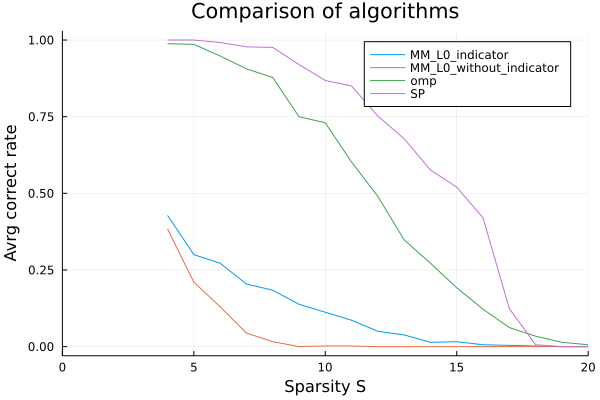

In [19]:
using  Plots
S = collect(4:1:20)
plot(S,correct_bit_l0_in,title = "Comparison of algorithms",xlabel = "Sparsity S",
ylabel = "Avrg correct rate",xlims = (0, 20),lab = "MM_L0_indicator")
plot!(S,correct_bit_l0_without_in,lab = "MM_L0_without_indicator")
plot!(S,correct_bit_omp,lab = "omp")
plot!(S,correct_bit_sp,lab = "SP")


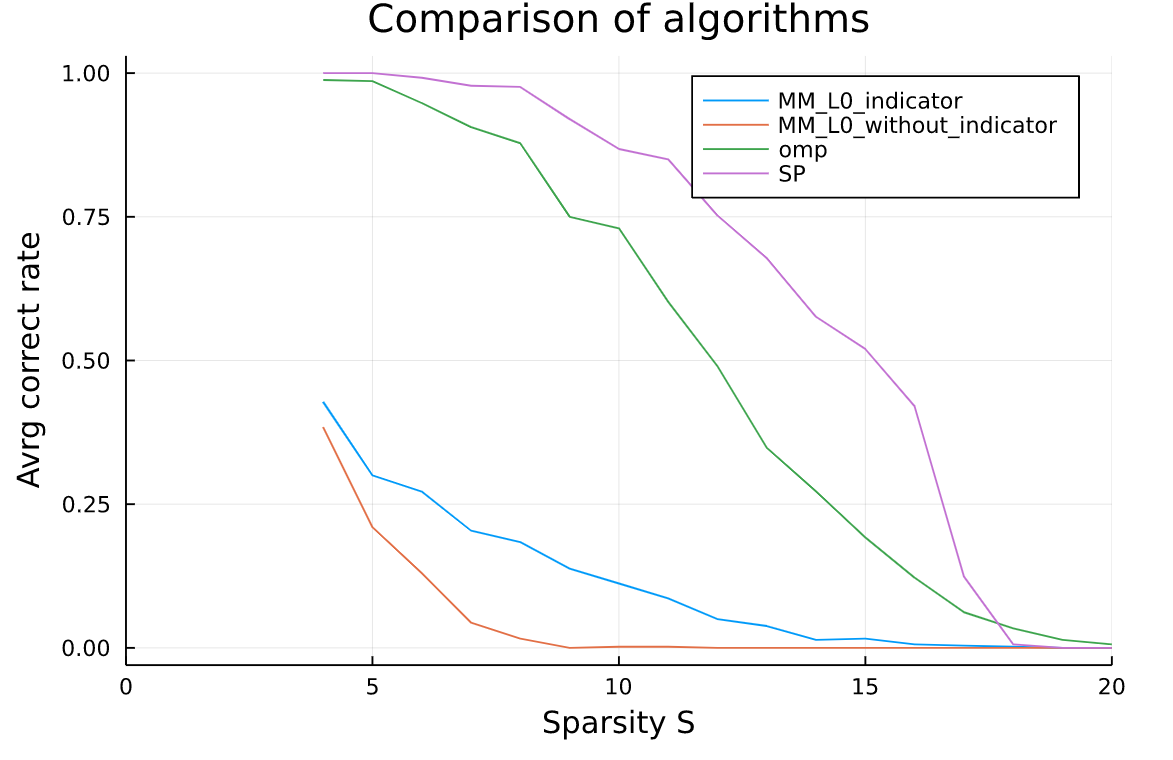

## Highlights

This coursework for Group 21 has been completed in its entierety. All 3 sections have been answered along with additional comments/explanations and no parts have been omitted. The specific parts of the coursework are highlighted as follows but please reference to the mentioned sections for more details.

### Least Squares: Solution Stability

In 1.1.1 SVD, there is a well-known error with the Julia SVD function where the value produced is not correct due to the result not converging to its true value. We want to highlight that we have fixed this rounding error in the first section. 
In 1.1.2 Error bounds the results questions 1 and 2 were found. There were as follows:
$$
0 \leq\left\|\hat{x}-x_{0}\right\|^{2}\leq \sigma_{\min }^{-2}\|\omega\|^{2}
$$
$$
\sigma_{\max }^{-2}n\sigma^2 \leq\text{E}_{W}[ \| \hat{\boldsymbol{x}} - \boldsymbol{x} \|^2 ]\leq \sigma_{\min }^{-2}n\sigma^2
$$
These results were also successfully verified in the simulation that we ran. This can be seen in the above coursework.

### Sparse Linear Inverse Problems:  ℓ0 -Minimization

This section included the following parts: 1.2.1 Measurement Matrix Generation and Properties, Mutual Coherence Constant (MCC) and the Restricted Isometry Constant (RIC).
For the 3 parts listed, functions were coded by Group, which were then both tested individually. All functions produced the correct results. There was also a discussion between the MCC and RIC and their respecitve computational complexities. Please refer to the relevant section in the coursework to find this part.

### **Subspace Pursuit (SP)**
* Required functions: supp_of_H(vector,s).

    -it returns the indexes of the biggest "s" elements of a vector. It is more efficent that the sortperm algorithm as it only finds the biggest s numbers without sorting any value
    
    
* Choosing the right break condition for the SP algorithm

    -The if condition has been optimised to suit both the cases with high sparcity and those with low sparcity. For the low sparcity cases we are setting the residue target to be 0. For the high sparcity cases due to approximation errors, the solution does not converge, hence we have set a target difference between the norm of the current and previous residues (when any aditional iterations are insignificant). The iteration limit is set for cases when s is big and the solution does not converge to a suitable result. 
    
### **Majorization Minimization (MM)** 
* Function encapsulation.

    - Encapsulating proximal function and g_function well into a big function.
    * Making it easier to understand and reuse, and also making the script easier to read.

- Well organized structures.
    
    * Readers can easily understand how x_next and x_cur updates.
    - Exact conditions for jumping out of while loop to get x_sol.


+ Success rate functions and Plots.

    * Running all algorithms parallel. Easier to see and compare their performance.
    
